### INTRODUCTION

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

The Decision Tree algorithm intuition is as follows:-

- For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

- For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

- This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.



### Breast Cancer DATASET 

I am using UCI ML Breast Cancer Wisconsin (Diagnostic) dataset from UCI machine learning repository. It will be loaded from sklearn.datasets so I havent attached the file with the submission. I'll try to  predict whether a tumor is malignant or benign using decision trees classifiers. 

Breast cancer is the most prevalent cancer in women in cities, and the second most common cancer in women in rural areas. We identify most breast cancers at an advanced stage is because of a lack of knowledge of the disease and the lack of a breast cancer screening program.With this case study, I hope to show the possibilities of a Decision tree for healthcare analysis-based machine learning algorithms in the early detection of breast cancer through test results and features. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier

cancer_data = load_breast_cancer()

In [2]:
type(cancer_data)

sklearn.utils.Bunch

## EDA : Exploratory Data Analysis

In [3]:
print("Feature Names: ",cancer_data.feature_names)

Feature Names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print("Feature Data:")
print(cancer_data.data)

Feature Data:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
print("Label Names: ", cancer_data.target_names)

Label Names:  ['malignant' 'benign']


In [6]:
print("Label Data:")
cancer_data.target

Label Data:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
cancer_df = pd.DataFrame(data = cancer_data['data'], columns = cancer_data['feature_names'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
import sweetviz as sv

In [9]:
cancer_report = sv.analyze(cancer_df)

                                             |      | [  0%]   00:00 -> (? left)

In [10]:
cancer_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Divide the data into train (80%) and test (20%)

In [11]:
from sklearn.model_selection import train_test_split
X = cancer_df.copy()
y = cancer_data.target

X_train , X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 0)

print(X_train.shape);
print(y_train.shape);
print("\r\n");
print(X_test.shape);
print(y_test.shape);

(455, 30)
(455,)


(114, 30)
(114,)


In [12]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=4)

# Fit dt to the training set
dt = dt.fit(X_train, y_train)

In [13]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [14]:
## working to identifiy the feature most useful in identifying breast cancer. 

feature_names = X.columns
feature_importance = pd.DataFrame(dt.feature_importances_,index=feature_names)
feature_importance

,0
mean radius,0.000000
mean texture,0.000000
mean perimeter,0.024081
mean area,0.000000
mean smoothness,0.034808
mean compactness,0.000000
mean concavity,0.000000
mean concave points,0.000000
mean symmetry,0.017598
mean fractal dimension,0.000000


<AxesSubplot:>

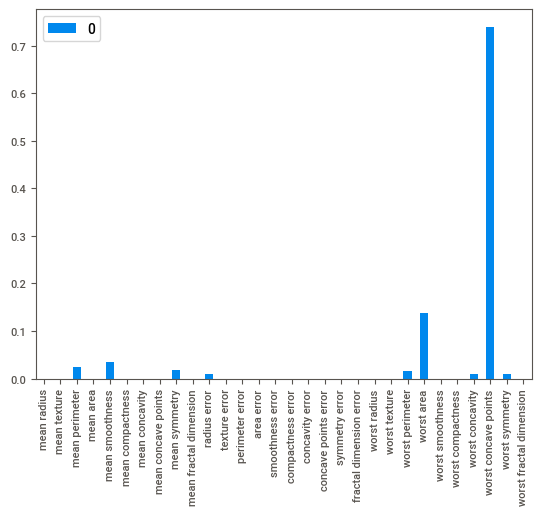

In [15]:
feature_importance.plot(kind="bar")

We find thart WORST CONCAVE POINTS are the most important feature in the diagonosis of Breast cancer. 



## Visualising the Decision Tree

[Text(0.5375, 0.9, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]\nclass = benign'),
 Text(0.325, 0.7, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]\nclass = benign'),
 Text(0.2, 0.5, 'worst perimeter <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]\nclass = benign'),
 Text(0.1, 0.3, 'worst symmetry <= 0.157\ngini = 0.036\nsamples = 269\nvalue = [5, 264]\nclass = benign'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0.15, 0.1, 'gini = 0.029\nsamples = 268\nvalue = [4, 264]\nclass = benign'),
 Text(0.3, 0.3, 'mean perimeter <= 91.92\ngini = 0.432\nsamples = 19\nvalue = [6, 13]\nclass = benign'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = malignant'),
 Text(0.35, 0.1, 'gini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = benign'),
 Text(0.45, 0.5, 'mean symmetry <= 0.152\ngini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = malignant'),
 Text(0.4, 0.3, 'gini

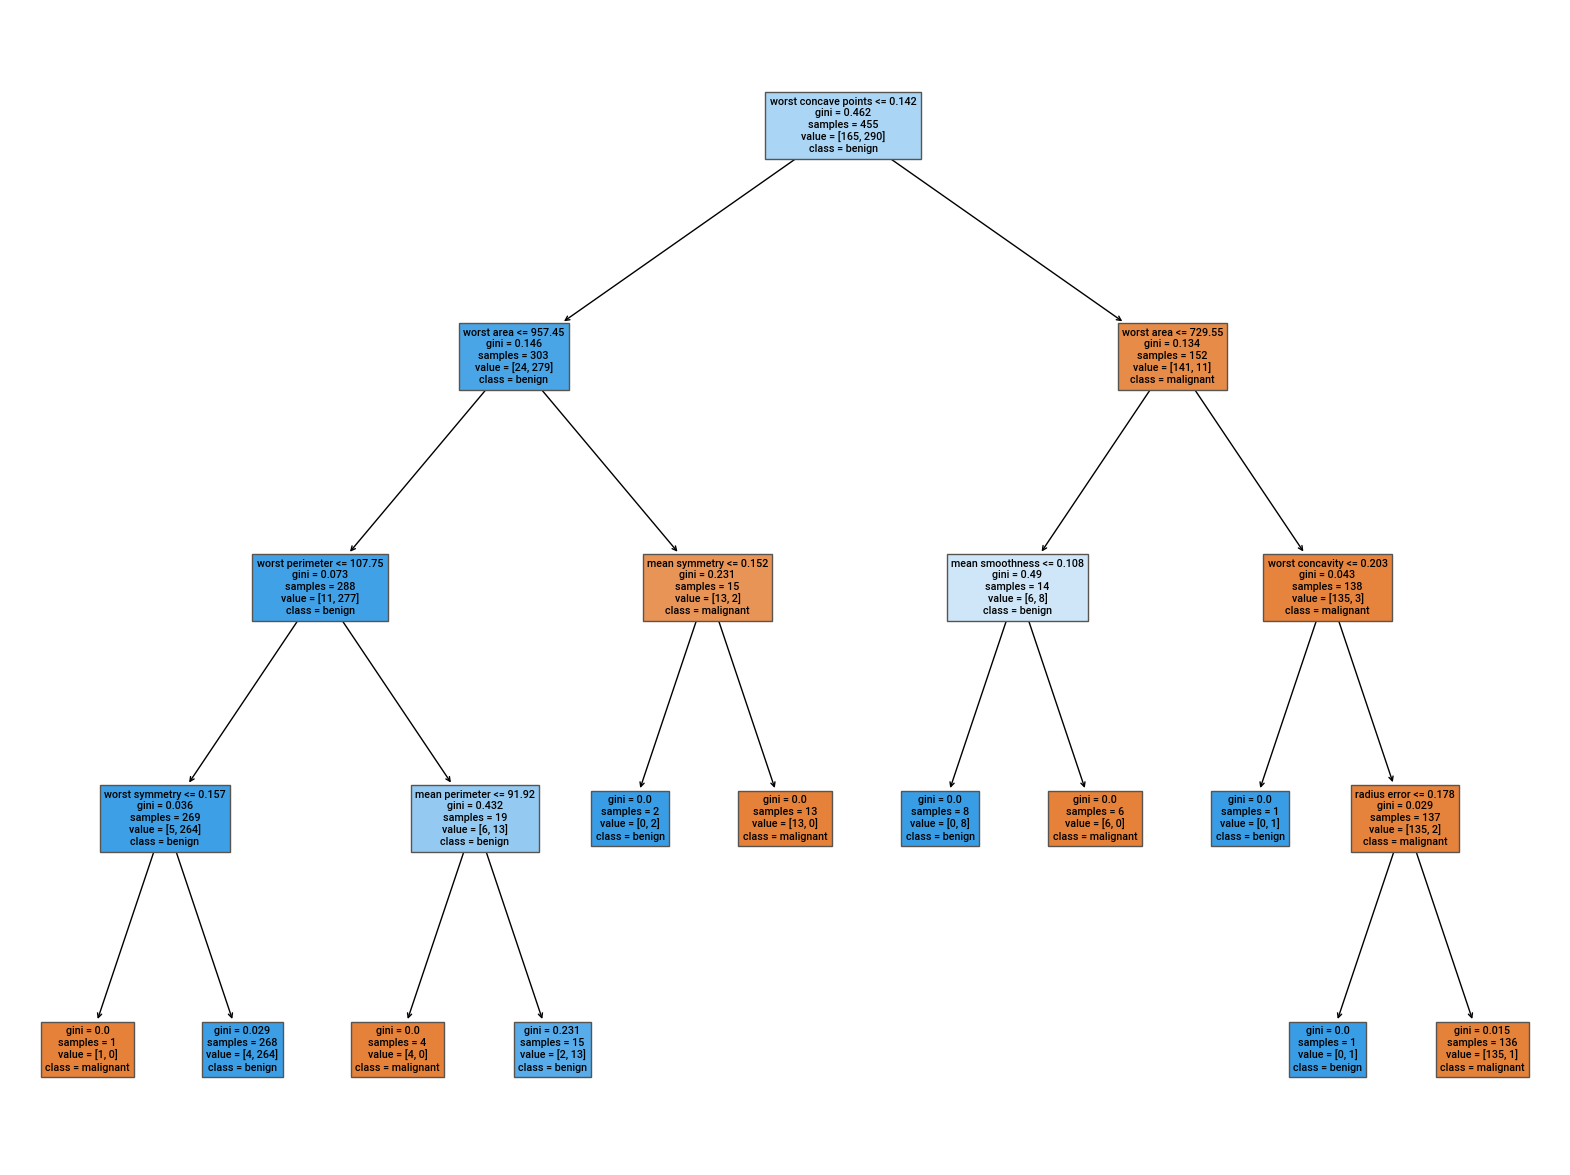

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, feature_names=cancer_data.feature_names, class_names=cancer_data.target_names, filled=True)

A decision tree for diagnosing breast cancer
At the very top, we find the feature with the name worst concave points to be the most informative, resulting in a split that separates the data into a group of 303 potentially benign samples and a group of 152 potentially malignant samples. 


## Checking the accuracy

In [17]:
from sklearn.metrics import accuracy_score
predictions = dt.predict(X_test)

# Compute test set accuracy
accuracy = accuracy_score(y_test, predictions)
print("Test set accuracy: {:.2f}".format(accuracy))

Test set accuracy: 0.96


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



The figure of the preceding tree gives us a good baseline performance. Without doing much, we already achieved 96 percent accuracy on the test set, thanks to scikit-learn's excellent default parameter values.